### 1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:
    а) зависимость цены на недвижимость в конкретном регионе от времени, 
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    в) количество отказов компьютера,
    г) число обращений в поликлинику по району,
    д) координаты автобуса при движении по маршруту,
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.
    
### Ответ

    a) Является временным рядом, так как стоимость одних и тех же объектов фиксируется в разные периоды времени,
    б) Можно интерпретировать как временной ряд, если фиксировать текущую скорость в каждый момент времени. В таком случае можно будет явно выделять фазы взлета, посадки и обычного полета,
    в) Не является временным рядом. Чтобы получился временной ряд - нужно фиксировать отказы, например, по дням.
    г) Не является временным рядом.
    д) Можно считать ременным рядом, каждому моменту движения можно сопоставить свои координаты.
    е) Если жостоверно известно, что сохранены координаты конкретного  нарушителя - можно считать временным рядом, описывающим изменение положения в пространстве нарушителя во времени
    
    
2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым. 

### 2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
data.head(24)

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0
2005-12-31 06:00:00,1372.0
2005-12-31 07:00:00,1402.0
2005-12-31 08:00:00,1425.0
2005-12-31 09:00:00,1502.0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


Text(0, 0.5, 'МВт')

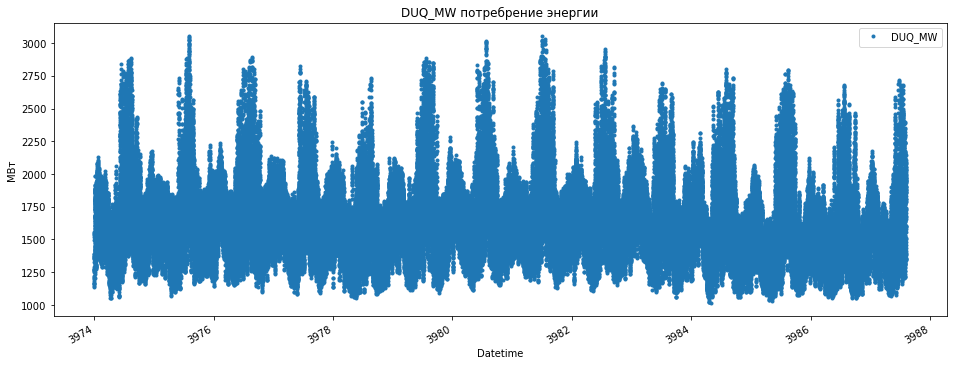

In [4]:
data.plot(figsize=(16, 6), style='.', title='DUQ_MW потребрение энергии')
plt.ylabel('МВт')

<AxesSubplot:>

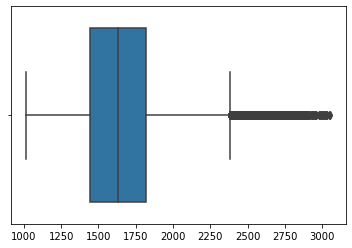

In [5]:
sns.boxplot(data.values)

In [6]:
data['date'] = data.index
data

,DUQ_MW,date
Datetime,,
2005-12-31 01:00:00,1458.0,2005-12-31 01:00:00
2005-12-31 02:00:00,1377.0,2005-12-31 02:00:00
2005-12-31 03:00:00,1351.0,2005-12-31 03:00:00
2005-12-31 04:00:00,1336.0,2005-12-31 04:00:00
2005-12-31 05:00:00,1356.0,2005-12-31 05:00:00
...,...,...
2018-01-01 20:00:00,1962.0,2018-01-01 20:00:00
2018-01-01 21:00:00,1940.0,2018-01-01 21:00:00
2018-01-01 22:00:00,1891.0,2018-01-01 22:00:00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   DUQ_MW  119068 non-null  float64       
 1   date    119068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 MB


Видим отсутствие  в данных пропусков, период добавления данных 1 час, период измерений                                          2005-12-31 01:00:00 по  2018-01-02 00:00:00

Посмотрим сколько всего часов в периоде за который получены  данные

In [8]:
my_data_time_M = pd.date_range('2005-12-31 01:00:00', '2018-01-02 00:00:00', freq="1H")
my_data_time_M

DatetimeIndex(['2005-12-31 01:00:00', '2005-12-31 02:00:00',
               '2005-12-31 03:00:00', '2005-12-31 04:00:00',
               '2005-12-31 05:00:00', '2005-12-31 06:00:00',
               '2005-12-31 07:00:00', '2005-12-31 08:00:00',
               '2005-12-31 09:00:00', '2005-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', length=105240, freq='H')

In [9]:
my_data_time_M.size

105240

In [10]:
data.shape[0]

119068

Число часов не совпадает с количеством знаблюдений  **105240 < 119068**? возможно связано с тем, что данные не отсортированы по дате, проверим.

In [11]:
min(data['date']),max(data['date'])

(Timestamp('2005-01-01 01:00:00'), Timestamp('2018-08-03 00:00:00'))

In [12]:
my_data_time_M = pd.date_range(min(data['date']),max(data['date']), freq="1H")
my_data_time_M.shape[0]

119088

Число часов не совпадает с количеством наблюдений  **119088 < 119068**, возможно это  связано с переходом на летнее/ зимнее время 

In [13]:
ut = data['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


In [14]:
count_data = data['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

Int64Index([ 1,  2,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23,  0],
           dtype='int64', name='Datetime')


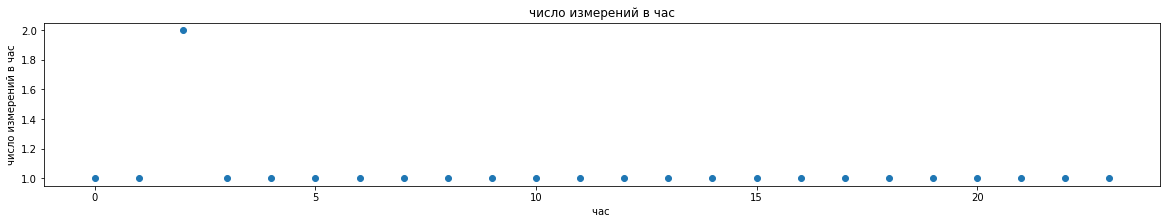

In [15]:
day_H=data['2017-11-05 00:00:00':'2017-11-05 23:00:00'].index.hour
print(day_H)
plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('час ')
plt.ylabel('число измерений в час')
plt.title('число измерений в час')
plt.show()

## Найдены даты, с количеством измерений более  1

In [16]:
data['2017-11-05 02:00:00']

,DUQ_MW,date
Datetime,,
2017-11-05 02:00:00,1131.0,2017-11-05 02:00:00
2017-11-05 02:00:00,1105.0,2017-11-05 02:00:00


In [17]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [18]:
# проверим пропуски
data['DUQ_MW'].isnull().sum()

0

In [19]:
data['date'] = data.index
data.head()

,DUQ_MW,date
Datetime,,
2005-12-31 01:00:00,1458.0,2005-12-31 01:00:00
2005-12-31 02:00:00,1377.0,2005-12-31 02:00:00
2005-12-31 03:00:00,1351.0,2005-12-31 03:00:00
2005-12-31 04:00:00,1336.0,2005-12-31 04:00:00
2005-12-31 05:00:00,1356.0,2005-12-31 05:00:00


In [20]:
import pandas_profiling

In [21]:
pandas_profiling.ProfileReport(data)

In [22]:
ddate2014 = data['2013-12-31 00:00:00':'2014-12-31 00:00:00'].index.tolist()
ddate2015 = data['2014-12-31 00:00:00':'2015-12-31 00:00:00'].index.tolist()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


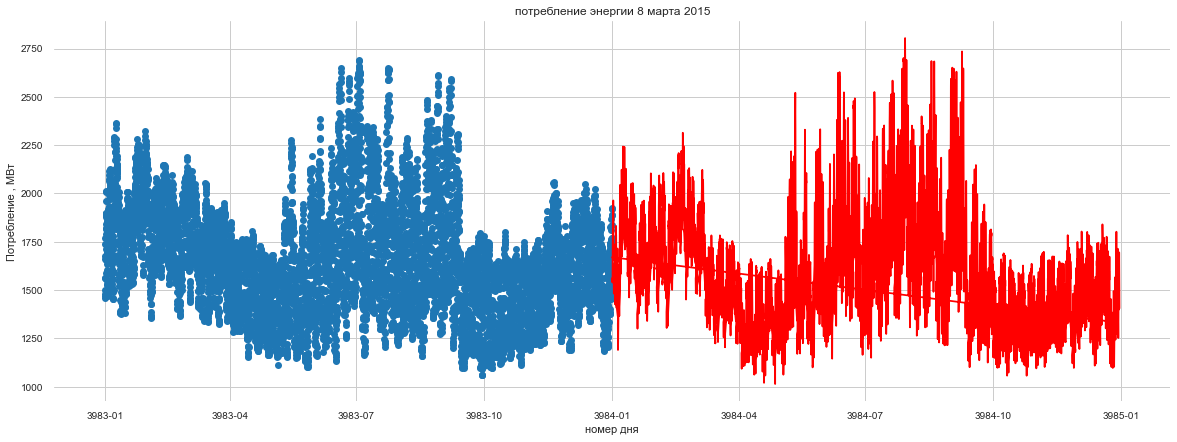

In [24]:
plt.figure(figsize=(20,7))
plt.plot(data.loc[ddate2014].index,data.loc[ddate2014]['DUQ_MW'].values, 'o')
plt.plot(data.loc[ddate2015].index,data.loc[ddate2015]['DUQ_MW'].values, 'r')
plt.grid()
plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии 8 марта 2015')

plt.show()

### Хорошо заметен годовой период потребления

In [25]:
ddate2014m01 = data['2014-01-01 00:00:00':'2014-02-01 00:00:00'].index.tolist()
ddate2015m01 = data['2015-01-01 00:00:00':'2015-02-01 00:00:00'].index.tolist()

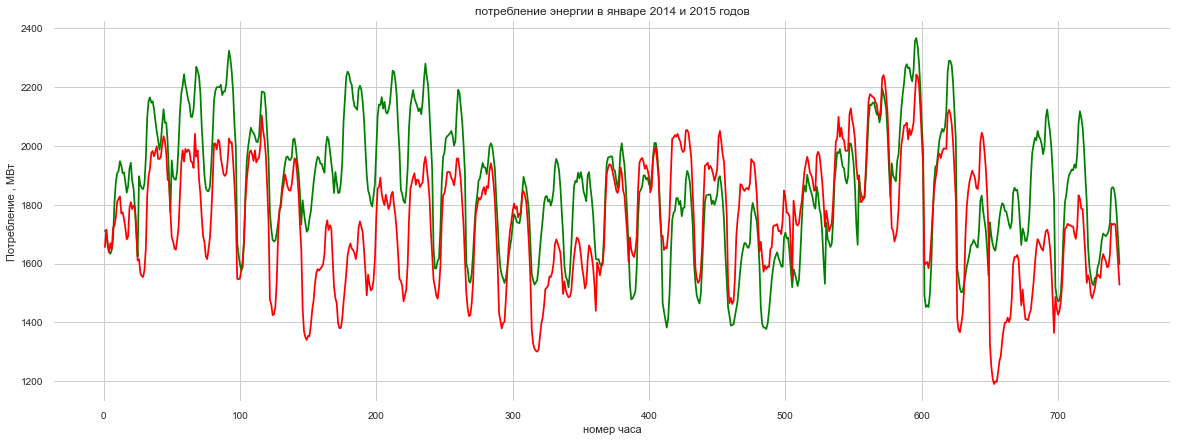

In [26]:
plt.figure(figsize=(20,7))
plt.plot(np.arange(1,len(ddate2014m01)+1) ,data.loc[ddate2014m01]['DUQ_MW'].values, 'g')
plt.plot(np.arange(1,len(ddate2015m01)+1) ,data.loc[ddate2015m01]['DUQ_MW'].values, 'r')
#line_ = pd.to_datetime(pd.Series(ddate))
plt.grid()
plt.xlabel('номер часа')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии в январе 2014 и 2015 годов')

plt.show()

### Хорошо заметна месячная  повторемость  потребления

In [27]:
ddate2014w = data['2014-01-14 00:00:00':'2014-01-21 00:00:00'].index.tolist()
ddate2015w = data['2015-01-14 00:00:00':'2015-01-21 00:00:00'].index.tolist()

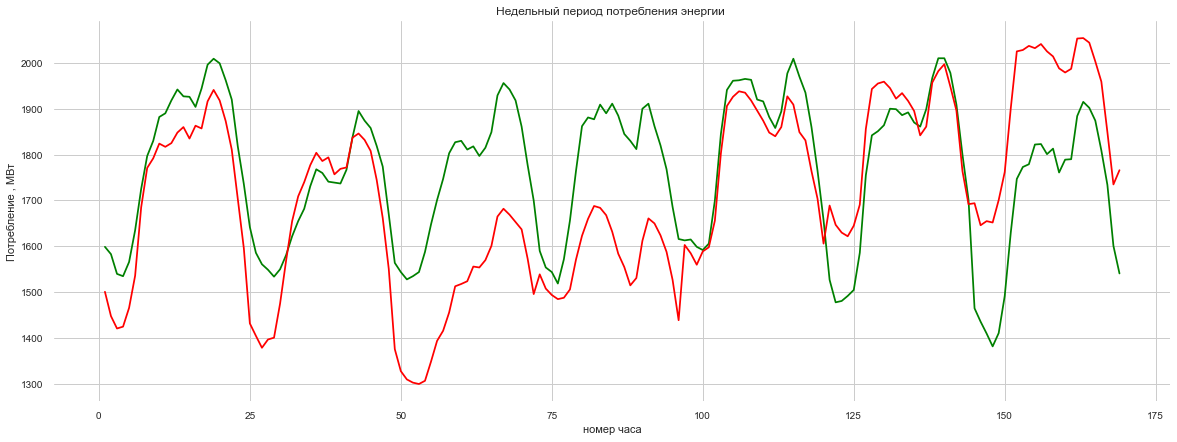

In [28]:
plt.figure(figsize=(20,7))
plt.plot(np.arange(1,len(ddate2014w)+1) ,data.loc[ddate2014w]['DUQ_MW'].values, 'g')
plt.plot(np.arange(1,len(ddate2015w)+1) ,data.loc[ddate2015w]['DUQ_MW'].values, 'r')
plt.grid()
plt.xlabel('номер часа')
plt.ylabel('Потребление , МВт')
plt.title('Недельный период потребления энергии ')

plt.show()

### Хорошо заметен недельный период потребления

In [29]:
ddate2014d = data['2014-01-14 00:00:00':'2014-01-15 00:00:00'].index.tolist()
ddate2015d = data['2015-01-14 00:00:00':'2015-01-15 00:00:00'].index.tolist()

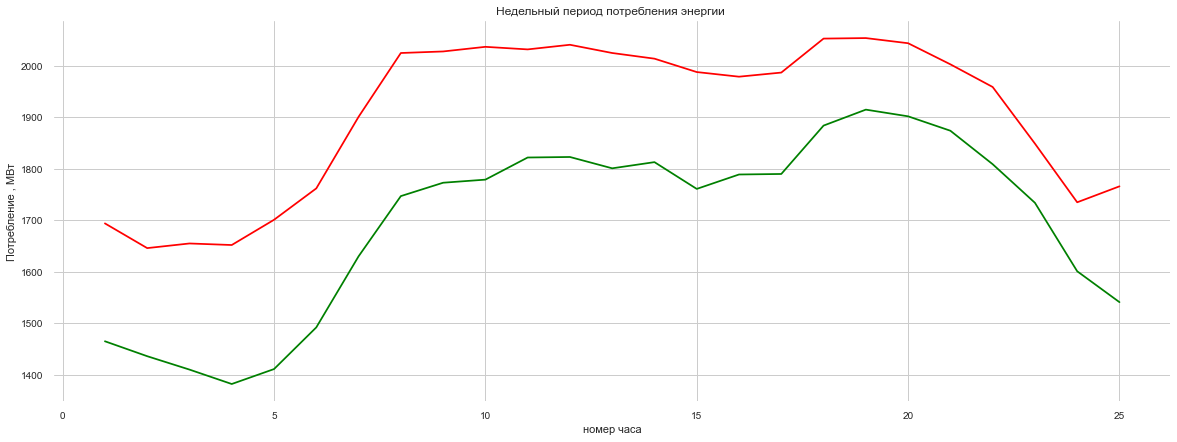

In [30]:
plt.figure(figsize=(20,7))
plt.plot(np.arange(1,len(ddate2014d)+1) ,data.loc[ddate2014d]['DUQ_MW'].values, 'g')
plt.plot(np.arange(1,len(ddate2015d)+1) ,data.loc[ddate2015d]['DUQ_MW'].values, 'r')
plt.grid()
plt.xlabel('номер часа')
plt.ylabel('Потребление , МВт')
plt.title('Недельный период потребления энергии ')

plt.show()

### Хорошо заметен недельный период потребления

<AxesSubplot:title={'center':'DUQ_MW потребрение энергии по годам'}, xlabel='Datetime'>

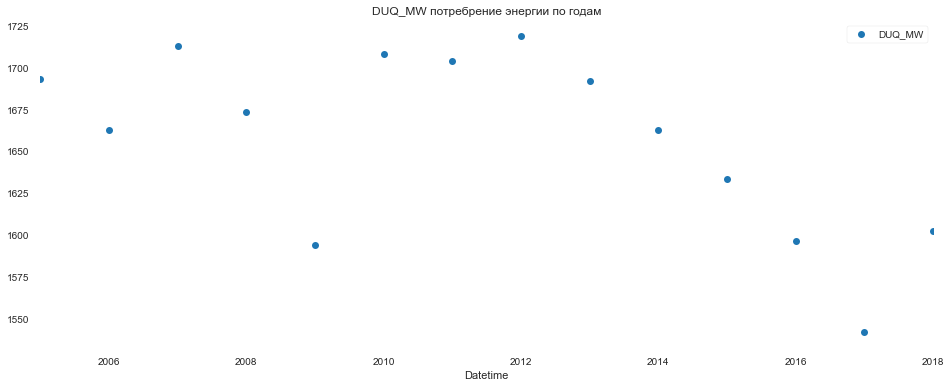

In [31]:
data.resample('Y').mean().plot(figsize=(16, 6), title='DUQ_MW потребрение энергии по годам', style='o')

**Выводы**
1) Данные цикличны как в рамках года. Мы выдим значительный рост потребления энергии в третьем квартале
2) Данные имеют суточный цикл и недельный . Явное снижение потребления энергии в ночной период. 
3) С 2012 года среднее потребление энергии за год снижалось, вплоть до 2017.

### 3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.


In [32]:
df = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_date=[0])

In [33]:
df.head(3)

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:title={'center':'цена нефти Brent'}, xlabel='Дата'>

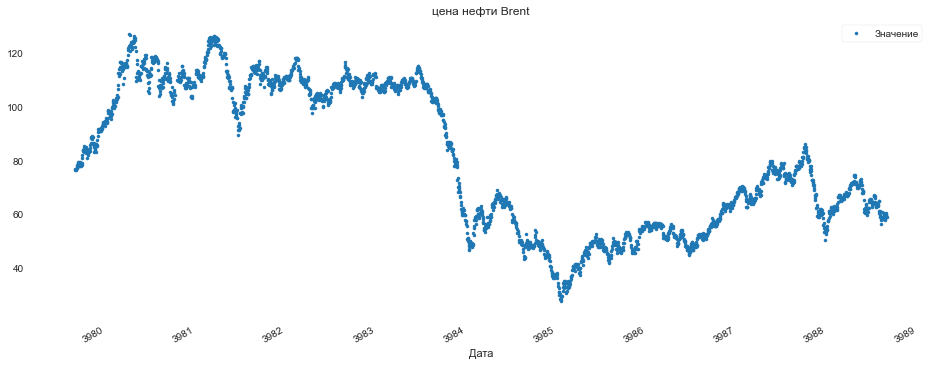

In [34]:
df.plot(figsize=(16, 6), style='.', title='цена нефти Brent')

<AxesSubplot:title={'center':'цена нефти Brent по неделям'}, xlabel='Дата'>

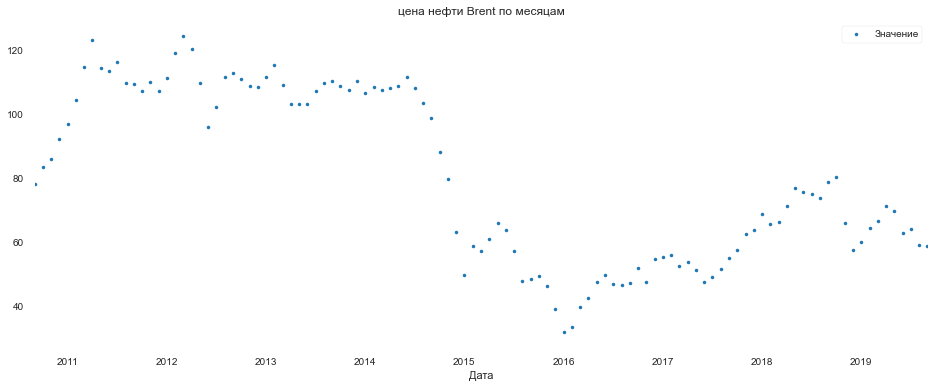

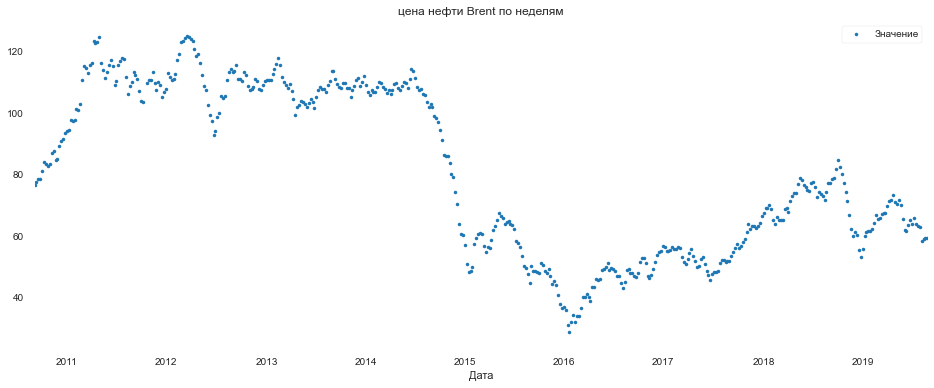

In [35]:
df.resample('M').mean().plot(figsize=(16, 6), style='.', title='цена нефти Brent по месяцам')
df.resample('W').mean().plot(figsize=(16, 6), style='.', title='цена нефти Brent по неделям')

### 4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

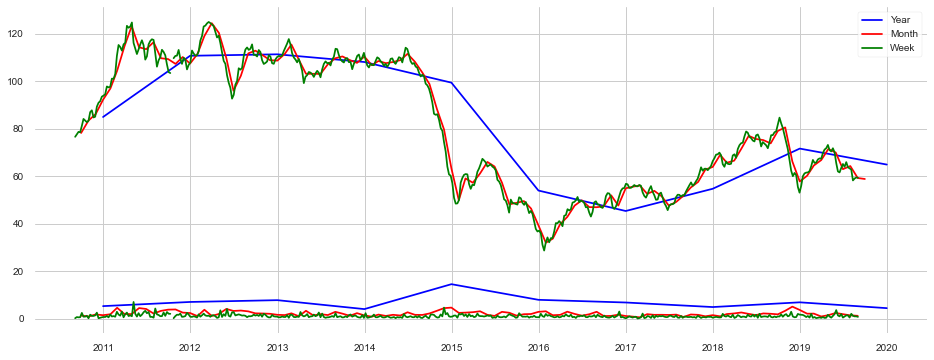

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(16, 6)
ax.grid()
ax.plot(df['Значение'].resample('Y').mean(), label='Year', color='b')
ax.plot(df['Значение'].resample('Y').std(), color='b')

ax.plot(df['Значение'].resample('M').mean(), label='Month', color='r')
ax.plot(df['Значение'].resample('M').std(), color='r')

ax.plot(df['Значение'].resample('W').mean(), label='Week', color='g')
ax.plot(df['Значение'].resample('W').std(), color='g')
ax.legend()

### 5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым

Недельный и месячные графики  подробно показывают основные  изменения и тренды.  <br>
Вместе с тем, если мы посмотрим на годовой график среднего отклонения - это значение достаточно высокое. Оно показывает нам, что за данный период цены значительно менялись.